In [19]:
import cv2
import numpy as np
from plyfile import PlyData, PlyElement
import glob
import matplotlib.pyplot as plt

from pixloc.pixlib.datasets.drs import DRS

In [2]:
ply_files = glob.glob("/tmp/*.ply")
plys = []
for ply_file in ply_files[:10]:
    with open(ply_file, "rb") as f:
        plys.append(PlyData.read(f))


In [5]:
sample_ply = plys[-1]

In [13]:
vertices = np.stack((sample_ply["vertex"]["x"],sample_ply["vertex"]["y"],sample_ply["vertex"]["z"]))

In [15]:
vertices.shape

(3, 131072)

(-83.49020547866822, 35.01462144851685, -6.613951921463013, 16.949188470840454)

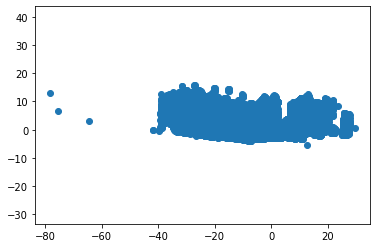

In [18]:
plt.scatter(vertices[1,:], vertices[2,:])
plt.axis("equal")

In [21]:
dataset = DRS({}).get_dataset({})

[11/25/2021 14:20:22 pixloc.pixlib.datasets.base_dataset INFO] Creating dataset DRS


In [23]:
len(dataset)

377